# Data Visualization with Seaborn

"`Seaborn` is a Python visualization library based on `Matplotlib`. It provides a high-level interface for drawing attractive statistical graphics."

Let's import it and give it the alias `sns`, which is done by convention.

In [1]:
import seaborn as sns
sns.set(rc={'axes.facecolor' : '#EEEEEE'})

The `sns.set()` function allows us to change some of the `rcParams`. Here, we're changing the plot's face color.

`seaborn` has the capacity to create a large number of informative, beautiful plots very easily. Here we'll review several types, but please visit their [gallery](https://seaborn.pydata.org/examples/index.html) for a more complete picture of all that you can do with `seaborn`.

We will also need to import numpy and for data import and manipulation.

In [2]:
import numpy as np
import pandas as pd

We will also need matplotlib for customizing our plots, since Seaborn is build upon matplotlib.

In [3]:
import matplotlib.pyplot as plt

Let's load the Gapminder dataset again and do some plotting with Seaborn.

In [4]:
gm = pd.read_csv('data/gapminder.tsv', sep='\t')
latest_year = gm['year'].max()
gm_latest = gm[gm['year']==latest_year]

## Histograms

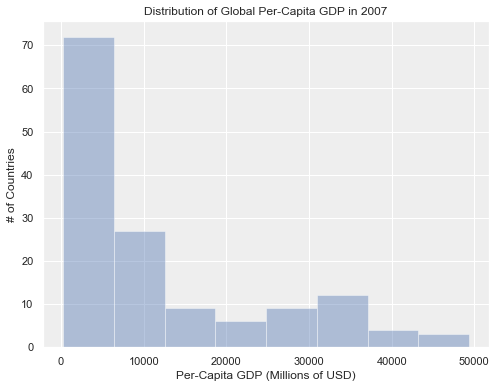

In [5]:
plt.figure(figsize=(8, 6))
sns.distplot(gm_latest['gdpPercap'], kde=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

#### Kernel Density Plots

We learned earlier that histograms can be used to visualize the discretized distribution of a variable. We must specify the number of bins in a histogram and as a result the shape of the distribution can change wildly dependening on that somewhat arbitrary choice.

A better way to plot a distribution is to estimate it's kernel density and plot it using `sns.kdeplot()`. Let's plot the kernel density for per-capita GDP in 2007 as we did earlier using a Hist. In fact, let's plot the two side by side using subplots.

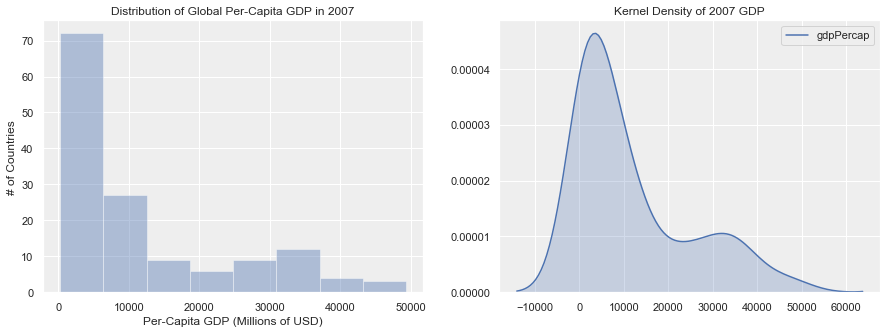

In [6]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(gm_latest['gdpPercap'], kde=False)
plt.title('Distribution of Global Per-Capita GDP in 2007')
plt.xlabel('Per-Capita GDP (Millions of USD)')
plt.ylabel('# of Countries');

plt.subplot(1,2,2)
sns.kdeplot(gm_latest['gdpPercap'], shade=True)
plt.title('Kernel Density of 2007 GDP');

In fact, both of these plots can be useful, and `seaborn` has another plot type called `sns.distplot()` which combines the two. Let's see how it works.

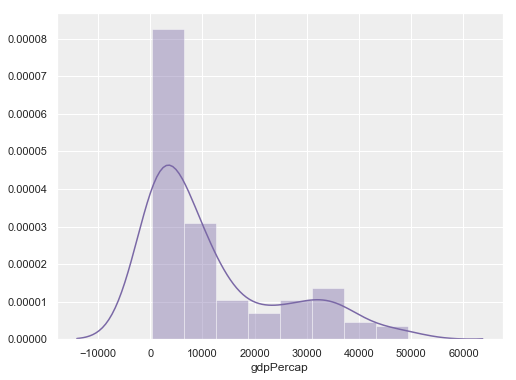

In [7]:
plt.figure(figsize=(8, 6))
sns.distplot(gm_latest['gdpPercap'], color='#7A68A6')

#### Joint Distribution Plots

When making a scatterplot, it is sometimes useful to not only see the relationship between the two variables, but to visualize each variables respective distribution. The `sns.jointplot` function in `seaborn` let's you do just that.

Let's compare the log of per-capita GDP and life expectancy in a joint distribution plot.

<Figure size 576x432 with 0 Axes>

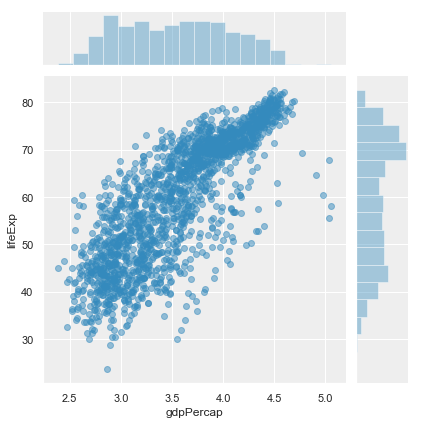

In [8]:
plt.figure(figsize=(8, 6))
sns.jointplot(np.log10(gm['gdpPercap']), gm['lifeExp'], color="#348ABD", alpha=0.5);

#### Pair Plots

If we wanted to look that the pairwise relationships between many different variables in a dataset, Seaborn also makes that very easy to do. 

Calling the `pairplot()` function on our entire dataset will give us a grid of such pairwise scatterplots, in addition to each variables distribution as a histogram along the diagonal.

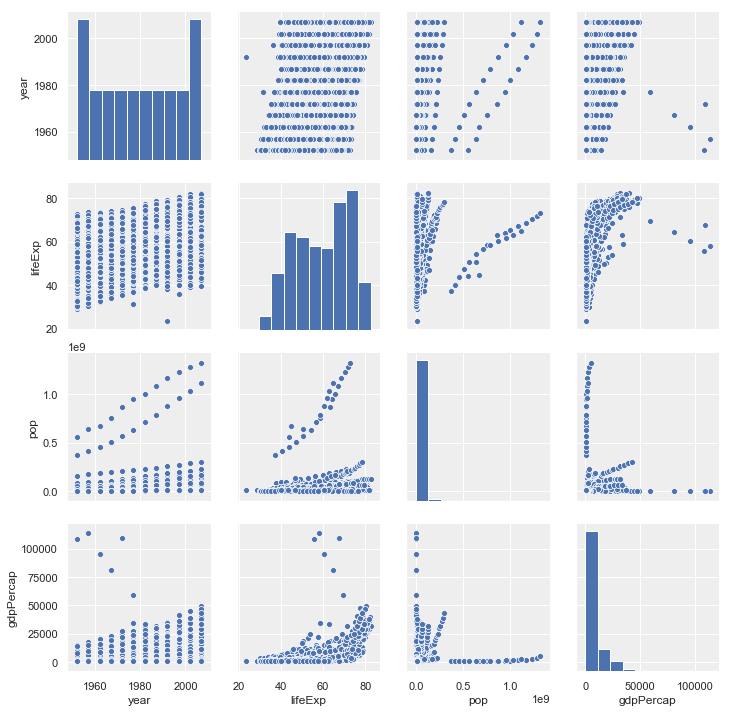

In [9]:
sns.pairplot(gm)

## Bar Plots

Bar plots are also made simple in Seaborn, once your data is correctly formatted. Let's do a little data manipulation so that we can visualize counts of countries per continent:

In [10]:
countries = gm[['country', 'continent']]
countries = countries.drop_duplicates()
country_counts = countries.groupby('continent', as_index=False)['country'].count()
country_counts.columns = ['continent', 'n_countries']
country_counts

,continent,n_countries
0,Africa,52
1,Americas,25
2,Asia,33
3,Europe,30
4,Oceania,2


Text(0, 0.5, 'Number of Countries')

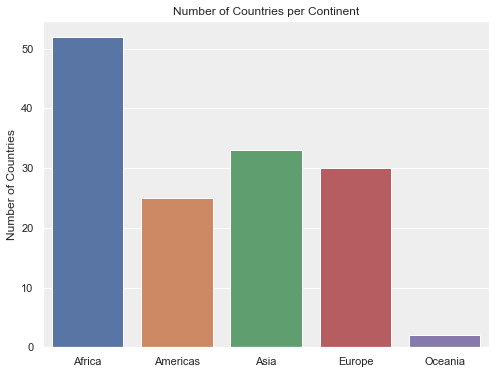

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(x="continent", y="n_countries", data=country_counts)
plt.title('Number of Countries per Continent')
plt.xlabel('')
plt.ylabel('Number of Countries')

## Boxplots

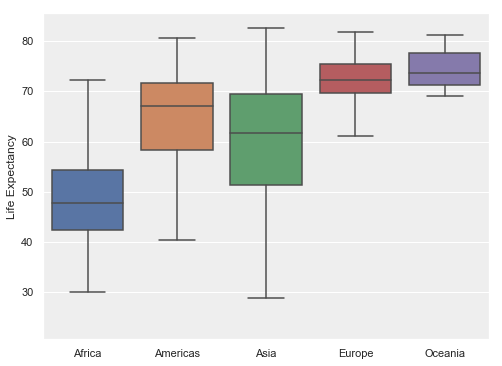

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="continent", y="lifeExp", data=gm, order=np.sort(gm.continent.unique()), fliersize=0)
plt.xlabel('')
plt.ylabel('Life Expectancy');

### Boxplot with strip plot

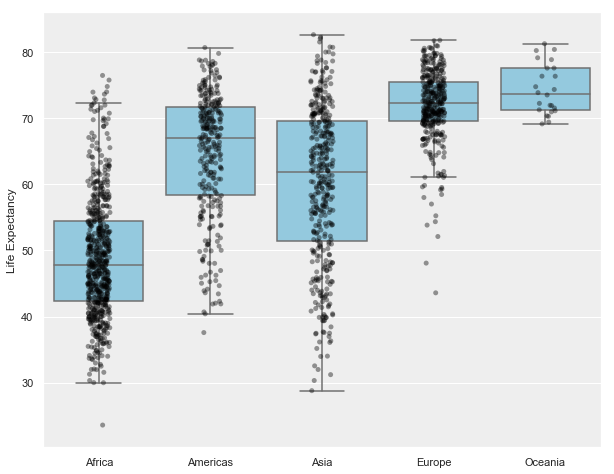

In [13]:
plt.figure(figsize=(10, 8))

sns.boxplot(x="continent", y="lifeExp", data=gm,
            order=np.sort(gm.continent.unique()),
            color='skyblue', fliersize=0)
sns.stripplot(x="continent", y="lifeExp", data=gm,
              order=np.sort(gm.continent.unique()),
              alpha=0.4, size=5, jitter=True,
              color='Black', edgecolor='Black')

plt.xlabel('')
plt.ylabel('Life Expectancy');

With just a few lines of code we have a very nice looking plot using `seaborn`. It's possible to create a stripplot using `Matplotlib`, but it's not as easy as it is with `Seaborn`.

## Scatterplots

Let's use `sns.scatterplot()` to visualize the relationship between per capita GDP (gdpPercap on the $x$-axis) and life expectancy (lifeExpon the $y$-axis) across all countries and all years. Specifying the marker='.' argument tells the plot to use small circles to indicate each data point. There are many other marker styles, see here for more.

Text(0, 0.5, 'Life Expectency (years)')

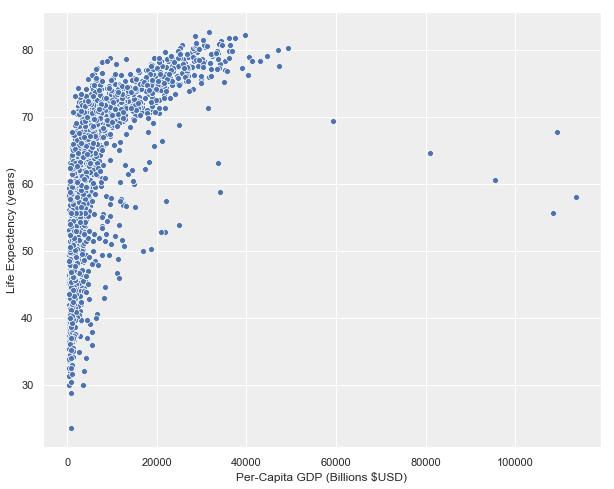

In [14]:
plt.figure(figsize=(10, 8))
sns.scatterplot(gm['gdpPercap'], gm['lifeExp'])
plt.xlabel('Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)')

Like with `plt.plot()`, the first argument in `plt.scatter()` corresponds to the $x$-axis and the second to the $y$-axis.

#### Transormations

The above scatter plot has some really large GDP values out to the right of the plot. When dealing with data that have large outliers like this, plotting a transformation of the data can make it more interpretable. A standard transformation is to apply the `log` function, so let's try that here.

**NOTE** Let's not forget to change the x-axis label to indicate the new units being displayed! 

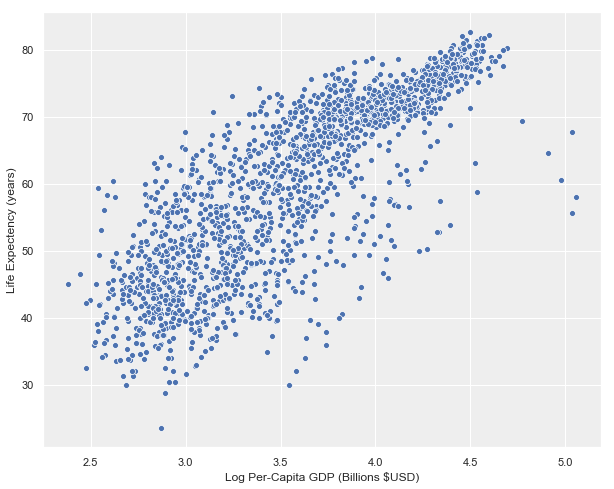

In [15]:
plt.figure(figsize=(10, 8))
sns.scatterplot(np.log10(gm['gdpPercap']), gm['lifeExp'])
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

That looks much better. We can now see there is somehwhat of a linear relationship between the log of GDP and life expectancy. Interesting!

#### Transparency

This plot looks good, but could be better, especially since there are so many points and they overlap. To fix that we can change the transparency, or opacity, of the face and edges of the markers using the `alpha` parameter. This is a value from `0`-`1`, where `0` is completely transparent (e.g. it's not displayed) to `1` being completely opaque (which is the default seen in the previous plot).


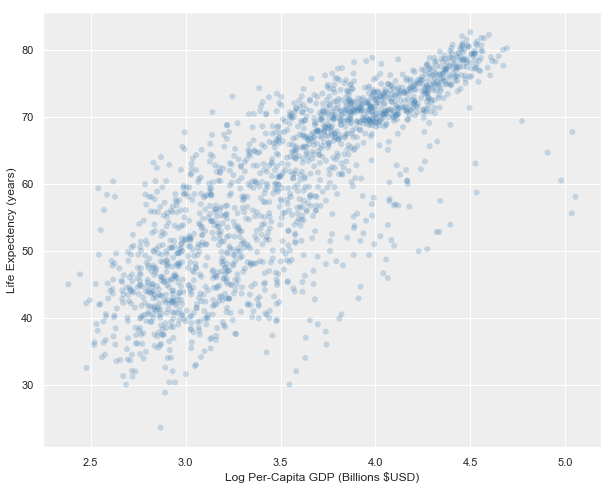

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(np.log10(gm['gdpPercap']), 
            gm['lifeExp'], 
            marker='o',
            alpha=0.25,
            facecolor='SteelBlue',
            edgecolor='None')
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

Now that we've seen that there exists a relationship between GDP and life expectancy at the global scale and across the last 50 years, let's see if we can use similar scatter plots to break that relationship down as a function of both time (year) and location (continent). 

#### Color

We can use different colored points in our scatterplot to visualize another dimension of our data. First, let's see what this looks like for a categorical variable such as continent:

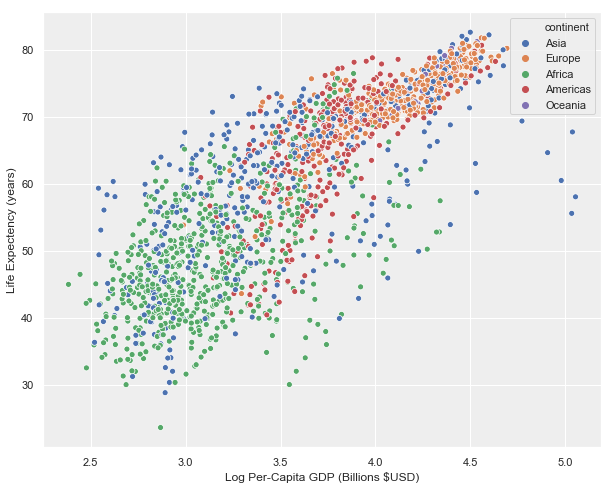

In [17]:
plt.figure(figsize=(10, 8))
sns.scatterplot(np.log10(gm['gdpPercap']), gm['lifeExp'], hue=gm['continent'])
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (years)');

Now, let's see how this looks with a continuous variable. We'll make the same exact scatter plot as we just did, but add color to represent the year the data comes from. We'll use the `hot` colormap which goes from black->red->orange->yellow->white.

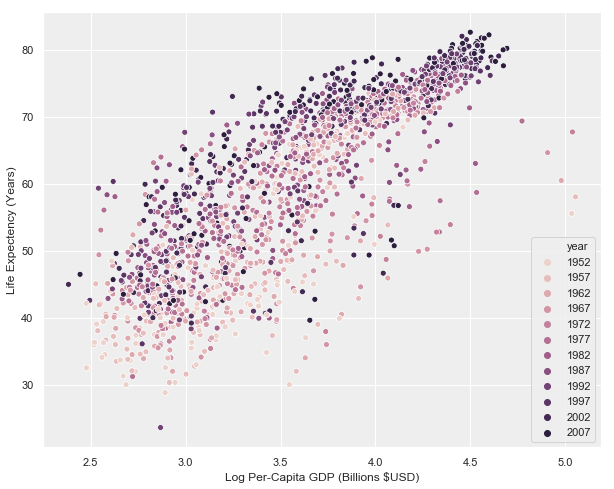

In [18]:
plt.figure(figsize=(10, 8))
sns.scatterplot(np.log10(gm['gdpPercap']), gm['lifeExp'], hue=gm['year'], legend="full")
plt.xlabel('Log Per-Capita GDP (Billions $USD)')
plt.ylabel('Life Expectency (Years)');

### Line Plots

In [19]:
gm.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

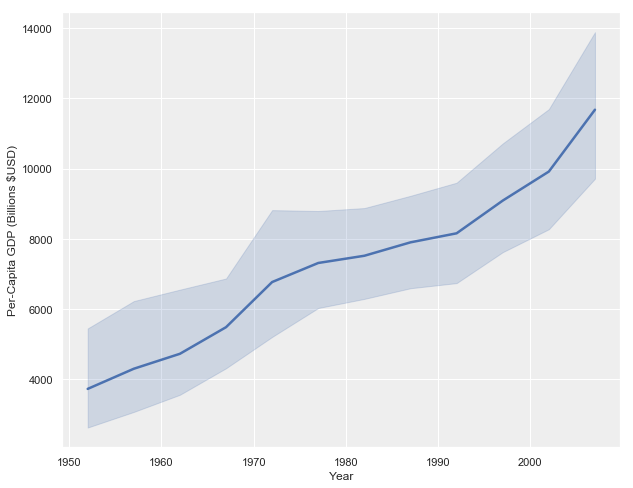

In [20]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=gm, x='year', y='gdpPercap', palette="tab10", linewidth=2.5)
plt.ylabel('Per-Capita GDP (Billions $USD)')
plt.xlabel('Year');

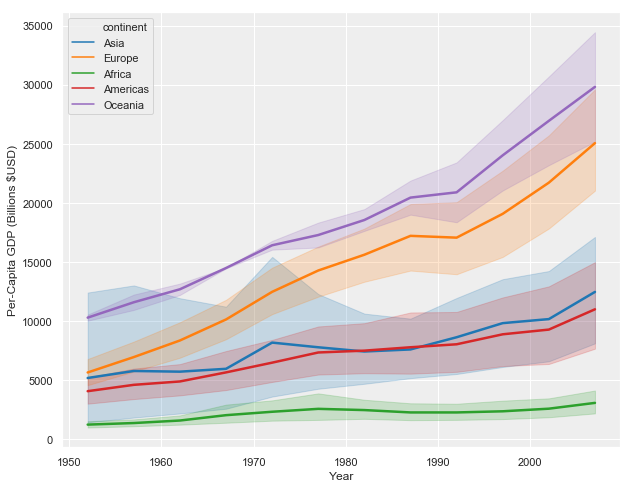

In [21]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=gm, x='year', y='gdpPercap', palette="tab10", linewidth=2.5, hue='continent')
plt.ylabel('Per-Capita GDP (Billions $USD)')
plt.xlabel('Year');

### Attribution

This demonstration was adapted from the Visualization with Python course developed by the social science Data Lab at UC Berkeley. The original course materials can be found here: https://github.com/dlab-berkeley/visualization-with-python/blob/master/visualization-with-python.ipynb